## Exercise MovieLens 电影数据分析

### 作业要求：（单人组）
Task1：在movielens 1M的数据集上，统计分析观影的性别偏好。

需要完成：

综合观影信息、评分信息，设计合理方案分别筛选出前20部比较流行的（rating > 300）男性/女性 偏好电影。

针对不同类型的电影（genres），统计分析男/女偏好程度（需要做归一化），通过双色直方图对比显示。

Task2：在movielens 1M的数据集上，通过观影及评分信息，预测观众的年龄-性别

需要完成：

拆分训练集-测试集（20%评测），实现评测方案（准确率-召回率）

实现分类器模型，对观影数超过100的用户进行预测。调整模型及参数。包括并不限于特征降维来获得较好的效果。（提示：在用户年龄预测问题中，由于年

龄段本身是具有序关系的。常规的模型优化方法不一定会有明显的效果， 有兴趣的同学可以看一下ordinal regression模型。有余力可以尝试，不算分。）

Task3：在movielens 1M的数据集上，通过观影-评分及电影简介等信息，对观影>100的用户实现用户画像。

包括且不限于：最喜欢-最不喜欢的电影类型。输出3-5部代表性的电影反映该用户的观影偏好。（可以通过对偏好的电影集合运用图分析技术或SVD分解来实现）

⾃定义⼀些合理的类型概 念，如，家庭主妇最爱，烧脑神剧等，对用户进行标签标记。或者综合电影风格，生成用户观影偏好的雷达图。生成用户偏好词云
等。


#### 读取moivelens 1M 数据（data目录）

- 1. user， movies， rating三个表

In [2]:
import numpy as np
import pandas as pd
# Reading ratings file
ratings = pd.read_csv('data/ratings2.csv',  encoding='latin-1', usecols=['user_id', 'movie_id', 'rating', 'timestamp'])

# Reading users file
users = pd.read_csv('data/users.csv', encoding='latin-1', usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])

# Reading movies file
movies = pd.read_csv('data/movies.csv',  encoding='latin-1', usecols=['movie_id', 'title', 'genres'])

In [6]:
ratings[int(1e6):int(1e6+10)]

,user_id,movie_id,rating,timestamp
1000000,6040,3552,2,956715942
1000001,6040,1952,5,957717017
1000002,6040,1954,3,960972782
1000003,6040,25,3,957717322
1000004,6040,348,2,956704972
1000005,6040,29,4,960972720
1000006,6040,1960,4,956715597
1000007,6040,1961,4,956703977
1000008,6040,1962,3,956715569
1000009,6040,1963,4,960972887


In [11]:
# a = data_mat_freq @ data_mat_freq.T  # 20分钟
# np.save("data/movie_coRating_count",a ) #保存数组
# a[0]
# 该数组在data目录里作为环数据境下发，可以直接使用

array([53,  7,  6, ...,  0, 15, 17])

In [3]:
# Reading movies info file
movies_info = pd.read_csv('data/info.csv',  encoding='latin-1', usecols=['id', 'name', 'genre','intro','directors','starts', 'release_time'])
movies_info.rename(columns ={ 'id':'movie_id', 'starts': 'stars'}, inplace = True)

In [6]:
movies_info

,movie_id,name,genre,release_time,intro,directors,stars
0,1,Toy Story (1995),Animation|Adventure|Comedy,22 November 1995 (USA),A cowboy doll is profoundly threatened and jea...,John Lasseter,Tom Hanks|Tim Allen|Don Rickles
1,2,Jumanji (1995),Adventure|Comedy|Family,15 December 1995 (USA),When two kids find and play a magical board ga...,Joe Johnston,Robin Williams|Kirsten Dunst|Bonnie Hunt
2,3,Grumpier Old Men (1995),Comedy|Romance,22 December 1995 (USA),John and Max resolve to save their beloved bai...,Howard Deutch,Walter Matthau|Jack Lemmon|Ann-Margret
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,22 December 1995 (USA),"Based on Terry McMillan's novel, this film fol...",Forest Whitaker,Whitney Houston|Angela Bassett|Loretta Devine
4,5,Father of the Bride Part II (1995),Comedy|Family|Romance,8 December 1995 (USA),George Banks must deal not only with the pregn...,Charles Shyer,Steve Martin|Diane Keaton|Martin Short
...,...,...,...,...,...,...,...
9737,193581,Kuroshitsuji: Book of the Atlantic (2017),Animation,21 January 2017 (Japan),A young lord and his demon butler board a luxu...,Noriyuki Abe|Stephen Hoff,Bryn Apprill|Dawn Michelle Bennett|Justin Briner
9738,193583,NÃ´gÃªmu nÃ´raifu: Zero (2017),Animation|Adventure|Comedy,19 July 2019 (China),"Adaption of the sixth Light Novel of series, i...",Atsuko Ishizuka,Alexandra Bedford|Jessica Boone|Ricardo Contreras
9739,193585,Flint (2017),Drama,TV Movie 28 October 2017,A woman deals with the toxic water scandal in ...,Bruce Beresford,Marin Ireland|Betsy Brandt|Queen Latifah
9740,193587,Bungou Stray Dogs: Dead Apple (2018),Animation,3 March 2018 (Japan),Rivalry between groups of criminals and detect...,Takuya Igarashi,Brian Beacock|Ray Chase|Lucien Dodge


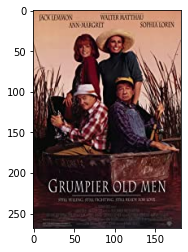

In [4]:
import matplotlib.pyplot as plt
import cv2 
poster_i = cv2.imread('data/poster/3.jpg',cv2.IMREAD_COLOR)
poster_i = cv2.cvtColor(poster_i, cv2.COLOR_BGR2RGB)
plt.imshow(poster_i)  

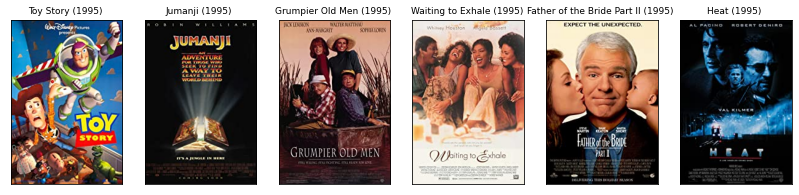

In [5]:
plt.figure(figsize=(14,10))
for i in movies_info[:6]['movie_id']:
    plt.subplot(1, 6, i)
    poster_i = cv2.imread('data/poster/'+ str(i) + '.jpg', 1)
    poster_i = cv2.cvtColor(poster_i, cv2.COLOR_BGR2RGB)
    plt.imshow(poster_i)
    plt.title(movies_info.iloc[i-1]['name'], size=9)
    plt.xticks(())
    plt.yticks(())
plt.show()